<a href="https://colab.research.google.com/github/Iksora03/Deep-Learning/blob/master/ResNeXt-50_Transfer%20Learning_Tomato%20Leaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==1.14.0
!pip install git+https://github.com/keras-team/keras-applications/
!pip install keras==2.2.4

     |████████████████████████████████| 109.2MB 30kB/s 
     |████████████████████████████████| 491kB 54.0MB/s 
     |████████████████████████████████| 3.2MB 70.8MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0
  Cloning https://github.com/keras-team/keras-applications/ to /tmp/pip-req-build-bu0nnoa5
  Running command git clone -q https://github.com/keras-team/keras-applications/ /tmp/pip-req-build-bu0nnoa5
  Created wheel for Keras-Applications: filename=Keras_Applications-1.0.8-cp36-none-any.whl size=62000 sha256=57d3c599b59cfe30fe64ae320e9a5632098dfc9351ffc99bcaeb611e368d78bc
  Stored in directory: /tmp/pip

In [0]:
import tensorflow as tf; print(tf.__version__)
import keras; print(keras.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0
2.2.4


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pickle
import cv2
import keras
from os import listdir
from keras import backend as K
from keras.layers import Input
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [0]:
EPOCHS = 50
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((224, 224))
image_size = 0
directory_root = "/content/drive/My Drive/Tomato_Leaf/"
width=224
height=224
depth=3

In [0]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [0]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [0]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    %time print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Tomato___Bacterial_spot ...
[INFO] Processing Tomato___Early_blight ...
[INFO] Processing Tomato___Late_blight ...
[INFO] Processing Tomato___Leaf_Mold ...
[INFO] Processing Tomato___Septoria_leaf_spot ...
[INFO] Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus ...
[INFO] Image loading completed
CPU times: user 114 µs, sys: 31 µs, total: 145 µs
Wall time: 150 µs


In [0]:
%%time
image_size = len(image_list)
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
n_classes = len(label_binarizer.classes_)
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42)
print(image_size)
print(label_binarizer.classes_)

1200
['Tomato___Bacterial_spot' 'Tomato___Early_blight' 'Tomato___Late_blight'
 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
CPU times: user 1.44 s, sys: 40.5 ms, total: 1.48 s
Wall time: 1.48 s


In [0]:
%%time
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras import models
from keras import layers
from keras_applications.resnext import ResNeXt50
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as resnet_pi
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda

base_model = ResNeXt50(weights='imagenet', 
                       backend=keras.backend,
                       layers=keras.layers, 
                       models=keras.models, 
                       include_top=False,
                       utils=keras.utils, 
                       input_shape=(150,150, 3))

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
preds=Dense(6,activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy
model.summary()








92659712/92652672 [==============================] - 1s 0us/step

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9408        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75

In [0]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_pad
11 conv2_block1_2_conv
12 reshape_1
13 conv2_block1_2_reduce
14 reshape_2
15 conv2_block1_2_bn
16 conv2_block1_2_relu
17 conv2_block1_0_conv
18 conv2_block1_3_conv
19 conv2_block1_0_bn
20 conv2_block1_3_bn
21 conv2_block1_add
22 conv2_block1_out
23 conv2_block2_1_conv
24 conv2_block2_1_bn
25 conv2_block2_1_relu
26 conv2_block2_2_pad
27 conv2_block2_2_conv
28 reshape_3
29 conv2_block2_2_reduce
30 reshape_4
31 conv2_block2_2_bn
32 conv2_block2_2_relu
33 conv2_block2_3_conv
34 conv2_block2_3_bn
35 conv2_block2_add
36 conv2_block2_out
37 conv2_block3_1_conv
38 conv2_block3_1_bn
39 conv2_block3_1_relu
40 conv2_block3_2_pad
41 conv2_block3_2_conv
42 reshape_5
43 conv2_block3_2_reduce
44 reshape_6
45 conv2_block3_2_bn
46 conv2_block3_2_relu
47 conv2_block3_3_conv
48 conv2_block3_3_bn
49 conv2_block3_add
50 conv2_block3_out
51

In [0]:
%%time
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=4,
    epochs=EPOCHS, verbose=1)

Epoch 1/50
4/4 [==============================] - 278s 70s/step - loss: 0.4637 - acc: 0.8454 - val_loss: 2.6854 - val_acc: 0.8056
Epoch 2/50
4/4 [==============================] - 265s 66s/step - loss: 0.2975 - acc: 0.9008 - val_loss: 1.7311 - val_acc: 0.8424
Epoch 3/50
4/4 [==============================] - 240s 60s/step - loss: 0.1976 - acc: 0.9247 - val_loss: 1.2057 - val_acc: 0.8917
Epoch 4/50
4/4 [==============================] - 263s 66s/step - loss: 0.1198 - acc: 0.9579 - val_loss: 1.8505 - val_acc: 0.8549
Epoch 5/50
4/4 [==============================] - 236s 59s/step - loss: 0.1314 - acc: 0.9597 - val_loss: 2.7338 - val_acc: 0.8125
Epoch 6/50
4/4 [==============================] - 259s 65s/step - loss: 0.1497 - acc: 0.9463 - val_loss: 1.8480 - val_acc: 0.8465
Epoch 7/50
4/4 [==============================] - 260s 65s/step - loss: 0.1120 - acc: 0.9633 - val_loss: 1.5116 - val_acc: 0.8764
Epoch 8/50
4/4 [==============================] - 239s 60s/step - loss: 0.1015 - acc: 0.96

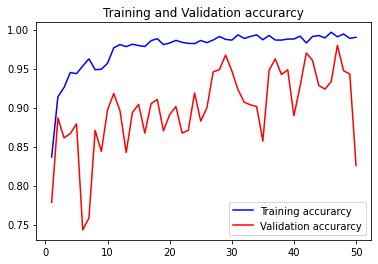

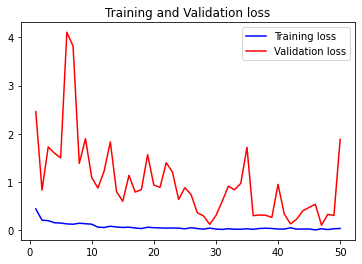

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()